#POWER CONSUMPTION

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploratory Data Analysis

In [ ]:
df=pd.read_excel("/content/drive/MyDrive/powerconsumptionproject.xlsx")

In [ ]:
data=df.copy()
data.head(5)

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Datetime                52416 non-null  datetime64[ns]
 1   Temperature             52416 non-null  float64       
 2   Humidity                52416 non-null  float64       
 3   WindSpeed               52416 non-null  float64       
 4   GeneralDiffuseFlows     52416 non-null  float64       
 5   DiffuseFlows            52416 non-null  float64       
 6   PowerConsumption_Zone1  52416 non-null  float64       
 7   PowerConsumption_Zone2  52416 non-null  float64       
 8   PowerConsumption_Zone3  52416 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.6 MB


In [ ]:
data.columns

Index(['Datetime', 'Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3'],
      dtype='object')

In [ ]:
data["Datetime"]=pd.to_datetime(data["Datetime"],format="%m/%d/%Y %H:%M")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Datetime                52416 non-null  datetime64[ns]
 1   Temperature             52416 non-null  float64       
 2   Humidity                52416 non-null  float64       
 3   WindSpeed               52416 non-null  float64       
 4   GeneralDiffuseFlows     52416 non-null  float64       
 5   DiffuseFlows            52416 non-null  float64       
 6   PowerConsumption_Zone1  52416 non-null  float64       
 7   PowerConsumption_Zone2  52416 non-null  float64       
 8   PowerConsumption_Zone3  52416 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.6 MB


In [ ]:
data

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [ ]:
data["Datetime"]=data["Datetime"].values.astype(float)

In [ ]:
data["Datetime"] = pd.to_datetime(data["Datetime"])  # Convert to datetime objects
data["Datetime"] = data["Datetime"].apply(lambda x: x.timestamp())

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  float64
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(9)
memory usage: 3.6 MB


# ZONE 3

EPOCH 12 BATCH SIZE 32

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_excel("/content/drive/MyDrive/powerconsumptionproject.xlsx")

# Set the DateTime column as the index
data["Datetime"] = pd.to_datetime(data["Datetime"], format="%m/%d/%Y %H:%M")
data.set_index('Datetime', inplace=True)

# Remove unnecessary columns
data = data[['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows']]

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create input sequences for LSTM
def create_sequences(dataset, seq_length):
    X = []
    y = []
    for i in range(len(dataset) - seq_length):
        X.append(dataset[i:i+seq_length])
        y.append(dataset[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Number of time steps
X, y = create_sequences(data_scaled, seq_length)

# Create an LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(seq_length, data.shape[1])))
model.add(Dense(data.shape[1]))  # Output layer size should match the number of features

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(X, y, epochs=12, batch_size=32)

# Prepare data for future predictions
last_data = data_scaled[-seq_length:]
future_data = np.array([last_data])

# Predict future values
predicted_data = []
num_predictions = 288  # For a week's worth of predictions (7 days)

for _ in range(num_predictions):
    prediction = model.predict(future_data)
    predicted_data.append(prediction)
    future_data = np.append(future_data[:, 1:, :], prediction.reshape(1, 1, data.shape[1]), axis=1)

# Convert predicted values back to the original scale
predicted_data = np.array(predicted_data).reshape((num_predictions, data.shape[1]))
predicted_data = scaler.inverse_transform(predicted_data)

# Create a DataFrame to display predicted values
prediction_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(minutes=10), periods=num_predictions, freq='10min')
prediction_df = pd.DataFrame(predicted_data, columns=data.columns, index=prediction_dates)
prediction_df.insert(0, 'Datetime', prediction_dates)
prediction_df.reset_index(drop=True, inplace=True)
print(prediction_df)

# Prepare predicted values for evaluation (similar to X and y datasets)
predicted_values_X, predicted_values_y = create_sequences(predicted_data, seq_length)

# Reshape predicted values to match the expected input shape for the model
predicted_values_X = np.reshape(predicted_values_X, (predicted_values_X.shape[0], seq_length, data.shape[1]))

# Calculate the model score
score = model.evaluate(predicted_values_X, predicted_values_y)
print("Model Score:", score)


Epoch 1/12
1638/1638 [==============================] - 15s 7ms/step - loss: 0.0028
Epoch 2/12
1638/1638 [==============================] - 13s 8ms/step - loss: 9.0451e-04
Epoch 3/12
1638/1638 [==============================] - 13s 8ms/step - loss: 7.9253e-04
Epoch 4/12
1638/1638 [==============================] - 13s 8ms/step - loss: 7.5445e-04
Epoch 5/12
1638/1638 [==============================] - 13s 8ms/step - loss: 7.3471e-04
Epoch 6/12
1638/1638 [==============================] - 13s 8ms/step - loss: 7.2140e-04
Epoch 7/12
1638/1638 [==============================] - 15s 9ms/step - loss: 7.1428e-04
Epoch 8/12
1638/1638 [==============================] - 15s 9ms/step - loss: 7.0810e-04
Epoch 9/12
1638/1638 [==============================] - 14s 8ms/step - loss: 7.0206e-04
Epoch 10/12
1638/1638 [==============================] - 13s 8ms/step - loss: 6.9865e-04
Epoch 11/12
1638/1638 [==============================] - 13s 8ms/step - loss: 6.9265e-04
Epoch 12/12
1/1 [=================

# RANDOM FOREST MODEL

In [ ]:
import pandas as pd
import joblib
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
data = pd.read_excel("/content/drive/MyDrive/powerconsumptionproject.xlsx")
data["Datetime"] = pd.to_datetime(data["Datetime"], format="%m/%d/%Y %H:%M")

# Convert the 'Datetime' column to a numerical representation (e.g., Unix timestamp)
data["Datetime"] = data["Datetime"].apply(lambda x: x.timestamp())

X = data.drop(columns=["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"])
y = data["PowerConsumption_Zone3"]

R^2 score: 0.9515536373284097
Mean Squared Error (MSE): 2100404.074555396
Mean Absolute Error (MAE): 876.8314187434148


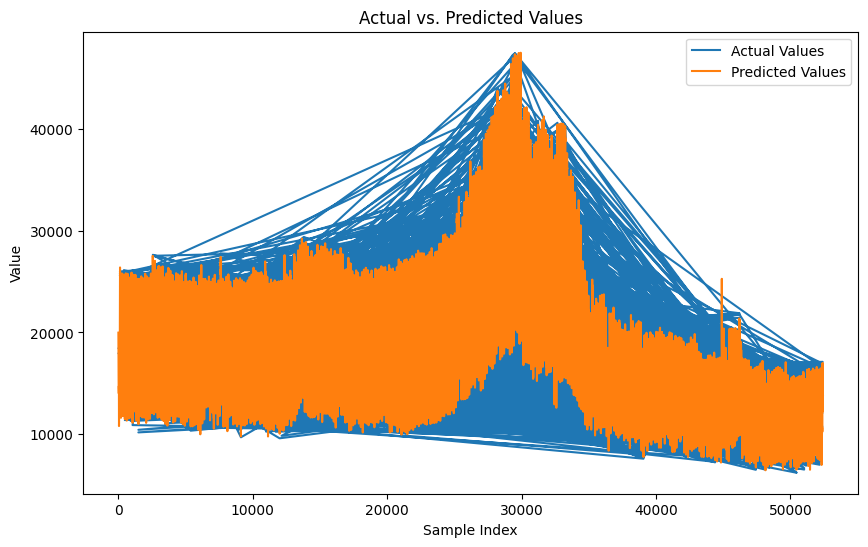

In [ ]:

X = data.drop(columns=["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"])
y = data["PowerConsumption_Zone3"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize the random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Save the model
joblib.dump(rf_model, "rf_model.joblib")

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("R^2 score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

# Random forest algorithm

# Extract the features from the new data
X_new = data[["Datetime", "Temperature", "Humidity", "WindSpeed", "GeneralDiffuseFlows", "DiffuseFlows"]]

# Make predictions on the new data
y_pred = rf_model.predict(X_new)
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


# PREDICTION GRAPH

         Datetime  Temperature   Humidity  WindSpeed  GeneralDiffuseFlows  \
0    1.514678e+18     6.548593  74.323647   0.103557             2.223968   
1    1.514679e+18     6.557119  74.154892   0.127433             4.888187   
2    1.514680e+18     6.583189  73.878380   0.149650             8.502044   
3    1.514680e+18     6.620382  73.541389   0.171600            13.201320   
4    1.514681e+18     6.668189  73.165199   0.193631            19.243042   
..            ...          ...        ...        ...                  ...   
283  1.514848e+18    10.561373  30.324701   0.558217           294.673096   
284  1.514849e+18    10.554990  30.316008   0.558323           294.598846   
285  1.514849e+18    10.548676  30.307467   0.558422           294.525848   
286  1.514850e+18    10.542434  30.299072   0.558515           294.453979   
287  1.514851e+18    10.536261  30.290825   0.558600           294.383148   

     DiffuseFlows  PowerConsumption_Zone3  
0        6.498384             8

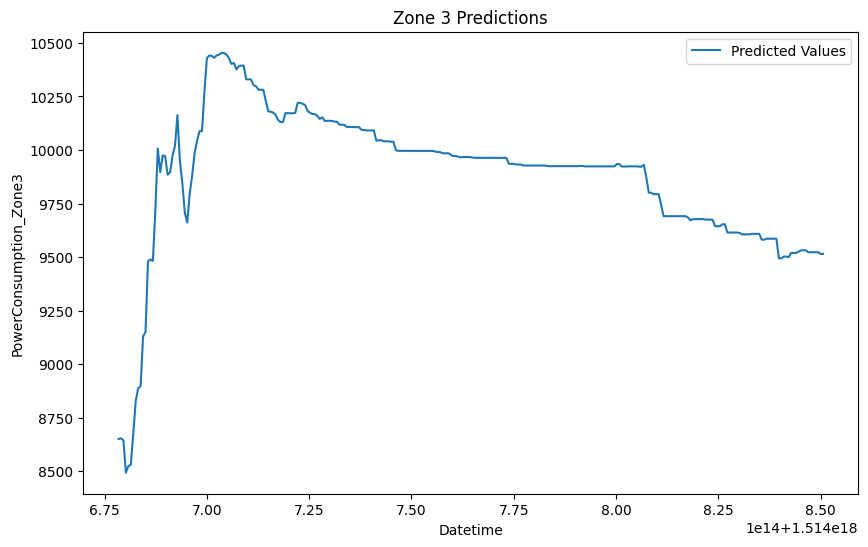

In [ ]:


# Load the trained model
rf_model = joblib.load('rf_model.joblib')

# Prepare the data for prediction
a = prediction_df
a["Datetime"] = a["Datetime"].values.astype(float)

# Adapt the column names expected by the model to the predicted dataset
column_names = ['Datetime', 'Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone3']
new_data = pd.DataFrame(columns=column_names)

# Predict Zone 1 Power Consumption values
zone3_pred = rf_model.predict(a)

# Add the predicted values to the new_data DataFrame
new_data['Datetime'] = a['Datetime']
new_data['Temperature'] = a['Temperature']
new_data['Humidity'] = a['Humidity']
new_data['WindSpeed'] = a['WindSpeed']
new_data['GeneralDiffuseFlows'] = a['GeneralDiffuseFlows']
new_data['DiffuseFlows'] = a['DiffuseFlows']
new_data['PowerConsumption_Zone3'] = zone3_pred

# Print the predicted values
print(new_data)

# Save the predicted values to an Excel file
new_data.to_excel('predictions.xlsx', index=False)

# Plot the predicted values on a graph
plt.figure(figsize=(10, 6))
plt.plot(new_data['Datetime'], new_data['PowerConsumption_Zone3'], label='Predicted Values')
plt.xlabel('Datetime')
plt.ylabel('PowerConsumption_Zone3')
plt.title('Zone 3 Predictions')
plt.legend()
plt.show()

#Linear Regression

In [ ]:
# Load the dataset
data = pd.read_excel("/content/drive/MyDrive/powerconsumptionproject.xlsx")
data["Datetime"] = pd.to_datetime(data["Datetime"], format="%m/%d/%Y %H:%M")

# Convert the 'Datetime' column to a numerical representation (e.g., Unix timestamp)
data["Datetime"] = data["Datetime"].apply(lambda x: x.timestamp())

X = data.drop(columns=["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"])
y = data["PowerConsumption_Zone3"]

R^2 score: 0.4783791657104901
Mean Squared Error (MSE): 22745027.948891986
Mean Absolute Error (MAE): 3818.792670813367


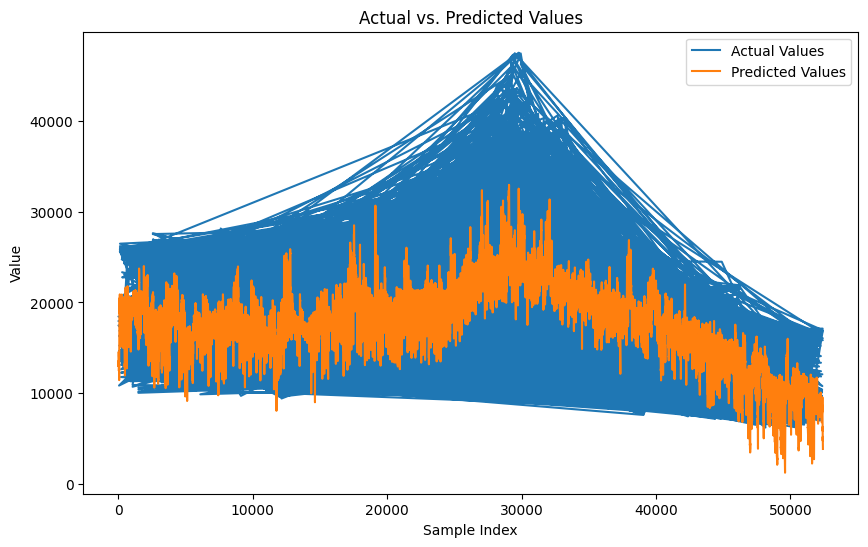

In [ ]:
from sklearn.linear_model import LinearRegression
# Linear
# Separate features and target
X = data.drop(columns=["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"])
y = data["PowerConsumption_Zone3"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lr_model.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("R^2 score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

# Extract the features from the new data
X_new = data[["Datetime", "Temperature", "Humidity", "WindSpeed", "GeneralDiffuseFlows", "DiffuseFlows"]]

# Make predictions on the new data
y_pred = lr_model.predict(X_new)

# Plot the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


#SVM

R^2 score: -0.05170171967810977
Mean Squared Error (MSE): 45858952.395102665
Mean Absolute Error (MAE): 5030.638180049882


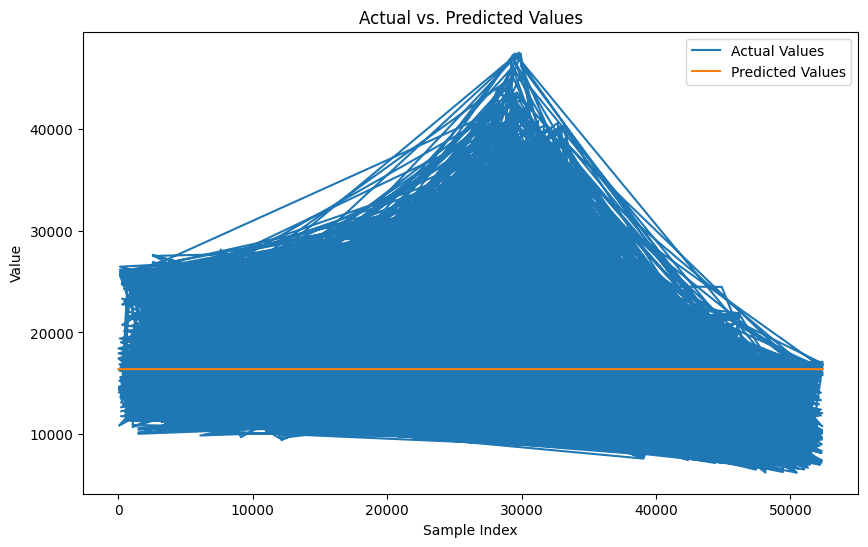

In [ ]:
from sklearn.svm import SVR
# Support Vector
# Separate features and target
X = data.drop(columns=["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"])
y = data["PowerConsumption_Zone3"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the support vector regression model
svr_model = SVR()

# Train the model on the training data
svr_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svr_model.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("R^2 score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

# Extract the features from the new data
X_new = data[["Datetime", "Temperature", "Humidity", "WindSpeed", "GeneralDiffuseFlows", "DiffuseFlows"]]

# Make predictions on the new data
y_pred = svr_model.predict(X_new)

# Plot the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


#Decision Tree

R^2 score: 0.8793834871614601
Mean Squared Error (MSE): 5259425.573649201
Mean Absolute Error (MAE): 1084.9541477457076


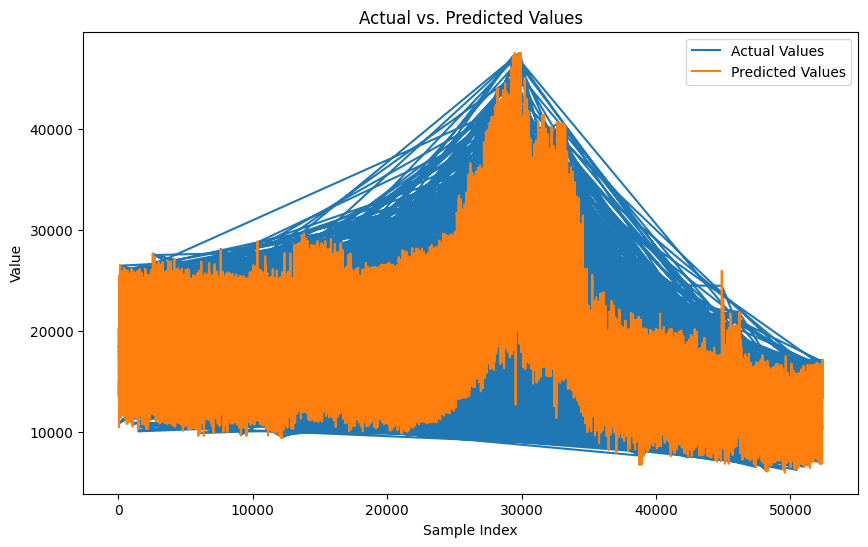

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Separate features and target
X = data.drop(columns=["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"])
y = data["PowerConsumption_Zone3"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree regressor
dt_model = DecisionTreeRegressor()

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_model.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("R^2 score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

# Extract the features from the new data
X_new = data[["Datetime", "Temperature", "Humidity", "WindSpeed", "GeneralDiffuseFlows", "DiffuseFlows"]]

# Make predictions on the new data
y_pred = dt_model.predict(X_new)

import matplotlib.pyplot as plt

# Plot the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


#KNN

R^2 score: 0.9963379711583642
Mean Squared Error (MSE): 159681.0228374161
Mean Absolute Error (MAE): 238.87106944534526


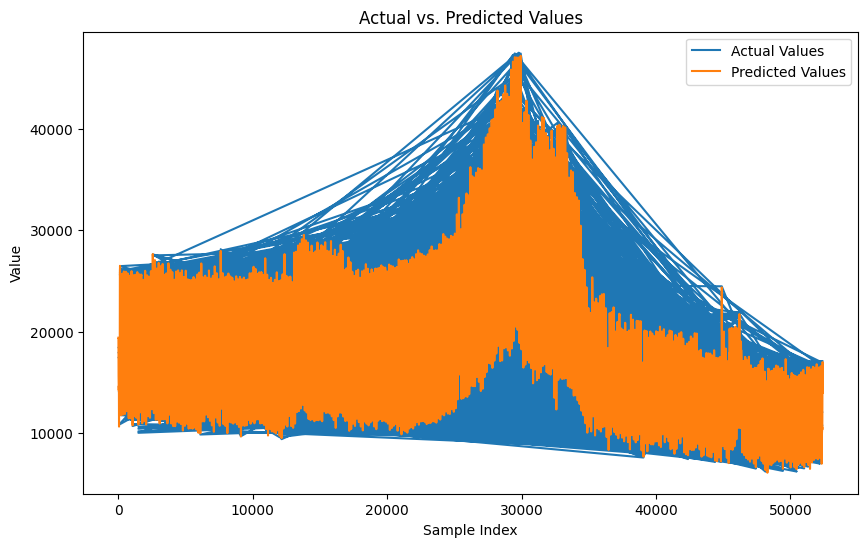

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
# K-Nearest Neighbors
# Separate features and target
X = data.drop(columns=["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"])
y = data["PowerConsumption_Zone3"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the K-Nearest Neighbors regressor
knn_model = KNeighborsRegressor()

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn_model.predict(X_test)

# Save the model
joblib.dump(knn_model, "knn_model.joblib")

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("R^2 score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

# Extract the features from the new data
X_new = data[["Datetime", "Temperature", "Humidity", "WindSpeed", "GeneralDiffuseFlows", "DiffuseFlows"]]

# Make predictions on the new data
y_pred = knn_model.predict(X_new)

import matplotlib.pyplot as plt

# Plot the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import joblib
from datetime import datetime, timedelta

# Load the trained model
knn_model = joblib.load("knn_model.joblib")  # Update the filename with the actual trained model

# Define the target date and the number of days for prediction
target_date = np.datetime64("2023-06-06")
num_days = 7

# Create a new DataFrame for prediction
new_data = pd.DataFrame(columns=["Datetime", "Temperature", "Humidity", "WindSpeed", "GeneralDiffuseFlows", "DiffuseFlows"])

# Fill in data for prediction
for i in range(num_days):
    new_row = pd.DataFrame({
        "Datetime": [target_date + np.timedelta64(i, 'D')],
        "Temperature": [20],  # Specify other features you want to predict here
        "Humidity": [17],
        "WindSpeed": [10],
        "GeneralDiffuseFlows": [20],
        "DiffuseFlows": [15]
    })
    new_data = pd.concat([new_data, new_row], ignore_index=True)

new_data['Datetime'] = new_data['Datetime'].astype('int64') // 10**9

# Make predictions using the modified new_data
predictions = knn_model.predict(new_data)

# Print prediction results
for i in range(num_days):
    date = target_date + np.timedelta64(i, 'D')
    prediction = predictions[i]
    print(f"Date: {date}, Prediction: {prediction}")


Date: 2023-06-06, Prediction: 13974.741894
Date: 2023-06-07, Prediction: 13974.741894
Date: 2023-06-08, Prediction: 13974.741894
Date: 2023-06-09, Prediction: 13974.741894
Date: 2023-06-10, Prediction: 13974.741894
Date: 2023-06-11, Prediction: 13974.741894
Date: 2023-06-12, Prediction: 13974.741894


In [ ]:
joblib.dump({'model': knn_model, 'X_train': X_train, 'y_train': y_train}, "knn_model.joblib")

# When loading the model:
loaded_data = joblib.load("knn_model.joblib") # Removed extra space here
knn_model = loaded_data['model']
X_train = loaded_data['X_train']
y_train = loaded_data['y_train']

print("Training Features (X_train):\n", X_train)
print("\nTraining Target (y_train):\n", y_train)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import joblib
from datetime import datetime

# Example training data
data = pd.DataFrame({
    "Datetime": pd.date_range(start="2023-01-01", periods=100, freq='D').astype(int) // 10**9,
    "PowerConsumption_Zone3": np.random.rand(100) * 100  # Example power consumption values
})

# Features and target
X = data[["Datetime"]]
y = data["PowerConsumption_Zone3"]

# Train the model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X, y)

# Save the model
joblib.dump(knn_model, "knn_model.joblib")

import pandas as pd
import joblib
from datetime import datetime

# Load the trained model
knn_model = joblib.load("knn_model.joblib")

# Get input data from the user
target_date_str = input("Target Date (in YYYY-MM-DD format): ")

# Convert the target date string to datetime object
target_date = datetime.strptime(target_date_str, "%Y-%m-%d")

# Convert datetim10e object to Unix timestamp (seconds since epoch)
timestamp = int(target_date.timestamp())

# Create new data for prediction
new_data = pd.DataFrame({
    "Datetime": [timestamp]
})

# Make predictions
prediction = knn_model.predict(new_data)

print("Target Date:", target_date_str)
print("Predicted Zone 3 Power Consumption:", prediction)


Target Date (in YYYY-MM-DD format): 3000-02-20
Target Date: 3000-02-20
Predicted Zone 3 Power Consumption: [20.77373441]


# SVR

In [ ]:
# Linear Support Vectors
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Separate features and target
X = data.drop(columns=["PowerConsumption_Zone3"]) # Only drop 'PowerConsumption_Zone3'
y = data["PowerConsumption_Zone3"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.svm import LinearSVR

# Initialize the Linear Support Vector Regressor
svm_model = LinearSVR()

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_model.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("R^2 score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

R^2 score: -4.090573183946564
Mean Squared Error (MSE): 2824.8732769854514
Mean Absolute Error (MAE): 47.64400109122804


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# XGBoost


In [ ]:
import xgboost as xgb # XGBoost


# Separate features and target
X = data.drop(columns=["PowerConsumption_Zone3"]) # Only drop 'PowerConsumption_Zone3', as other columns don't exist
y = data["PowerConsumption_Zone3"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# Set the parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

# Train the model on the training data
xgb_model = xgb.train(params, dtrain)

# Make predictions on the testing data
y_pred = xgb_model.predict(dtest)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("R^2 score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

R^2 score: -0.8023032836578405
Mean Squared Error (MSE): 1000.1385303886454
Mean Absolute Error (MAE): 24.885912354109998


In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean squared error: ", mse)

Mean squared error:  942.7773833912543


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                100 non-null    int64  
 1   PowerConsumption_Zone3  100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


# FINAL ACTUAL VS PREDICTED POWER CONSUMPTION

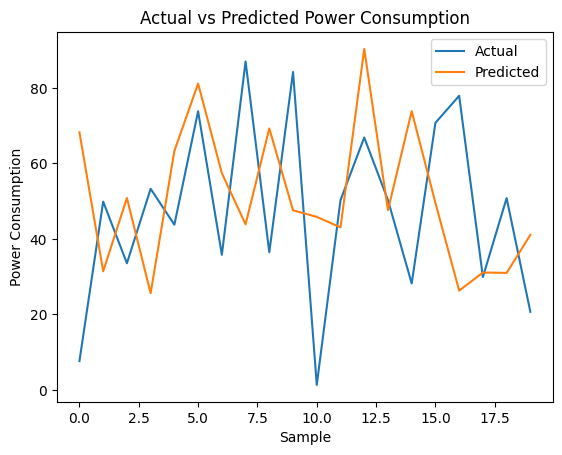

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual and predicted values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')

# Add labels and title
plt.xlabel('Sample')
plt.ylabel('Power Consumption')
plt.title('Actual vs Predicted Power Consumption')

# Add legend
plt.legend()

# Show the plot
plt.show()